In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load your CSV file
# Replace 'italy_data.csv' with the actual file path
italy_df = pd.read_csv(r'C:/Users/hp/Desktop/Italy_data.csv')

In [5]:
italy_df.head()

,country,country_lo,name,gppd_idnr,capacity_m,latitude,longitude,primary_fu,other_fuel,other_fu_1,...,estimated_,estimate_1,estimate_2,estimate_3,estimate_4,estimate_5,estimate_6,estimate_7,estimate_8,estimate_9
0,ITA,Italy,ACCEGLIO,WRI1021706,19.0,44.4742,7.0183,Hydro,NaN,NaN,...,36.22,49.22,46.09,55.36,36.73,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,ITA,Italy,ACERRA,WRI1021322,72.0,40.9319,14.3850,Other,NaN,NaN,...,NaN,NaN,NaN,NaN,266.88,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
2,ITA,Italy,ALFONSINE,WRI1021523,31.0,44.5715,11.9890,Solar,NaN,NaN,...,51.27,50.83,53.51,52.09,49.94,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,ITA,Italy,ALTOMONTE,WRI1002845,808.0,39.7118,16.2150,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,3076.17,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
4,ITA,Italy,ANAPO C.LE,WRI1002846,500.0,37.1183,15.1394,Hydro,NaN,NaN,...,827.82,850.76,750.05,1251.90,354.38,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [6]:
# Create a GeoDataFrame using latitude and longitude
geometry = gpd.points_from_xy(italy_df['longitude'], italy_df['latitude'])
italy_gdf = gpd.GeoDataFrame(italy_df, geometry=geometry)

In [7]:
# Define renewable and non-renewable plant types
renewable_types = ['Geothermal', 'Wind', 'Solar', 'Hydro']
non_renewable_types = ['Gas', 'Oil', 'Coal']

In [9]:
# Create a new column indicating whether the plant is renewable or not
italy_gdf['Renewable'] = italy_gdf['primary_fu'].isin(renewable_types)

In [15]:
# Separate renewable and non-renewable GeoDataFrames
renewable_gdf = italy_gdf[italy_gdf['Renewable']]
non_renewable_gdf = italy_gdf[~italy_gdf['Renewable']]

In [10]:
# Calculate the percentage of renewable and non-renewable plants
renewable_percentage = (italy_gdf['Renewable'].sum() / len(italy_gdf)) * 100
non_renewable_percentage = 100 - renewable_percentage

In [11]:
# Plot a pie chart
labels = ['Renewable', 'Non-Renewable']
sizes = [renewable_percentage, non_renewable_percentage]
colors = ['#66b3ff', '#99ff99']  # Blue for renewable, green for non-renewable

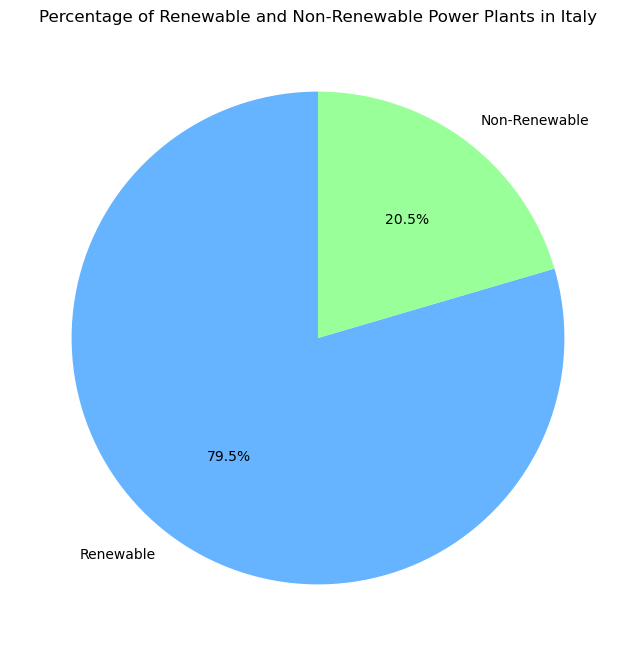

In [12]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Percentage of Renewable and Non-Renewable Power Plants in Italy')
plt.show()